**Общая информация**

**Срок сдачи:** 29 марта 2021, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics import accuracy_score

import scipy.stats
from scipy.spatial.distance import minkowski, cdist

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
    
    def fit(self, X, y):
        if (self.algorithm == 'brute'):
            self.X_train = X
            self.y_train = y
        if (self.algorithm == 'kd_tree'):
            self.X_train = X
            self.y_train = y
            self.tree = KDTree(self.X_train, leaf_size=30)
            
        return self
    
    def predict(self, X):
        test_dist = []
        test_labels = []
        if (self.algorithm == 'brute'):
            t_dist = np.argsort(cdist(X, self.X_train, metric='minkowski', p=2), axis=1)[:, :self.n_neighbors]
            labels = self.y_train[t_dist]
            a = scipy.stats.mode(labels, axis=1)
        if (self.algorithm == 'kd_tree'):
            dist, ind = self.tree.query(X, k=self.n_neighbors)
            labels = self.y_train[ind]
            a = scipy.stats.mode(labels, axis=1)
            
        return a[0].ravel()
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

MyKNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

CPU times: user 725 µs, sys: 340 µs, total: 1.06 ms
Wall time: 727 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [9]:
%time my_clf.fit(X_train, y_train)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 6.91 µs


MyKNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [10]:
%time clf.predict(X_test)

CPU times: user 2.33 ms, sys: 781 µs, total: 3.11 ms
Wall time: 2.32 ms


array([2, 1, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 0, 2, 1])

In [11]:
%time my_clf.predict(X_test)

CPU times: user 2.27 ms, sys: 1.38 ms, total: 3.64 ms
Wall time: 2.27 ms


array([2, 1, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 0, 2, 1])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

CPU times: user 851 µs, sys: 236 µs, total: 1.09 ms
Wall time: 932 µs


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [15]:
%time my_clf.fit(X_train, y_train)

CPU times: user 169 µs, sys: 23 µs, total: 192 µs
Wall time: 175 µs


MyKNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [16]:
%time clf.predict(X_test)

CPU times: user 2.52 ms, sys: 1.15 ms, total: 3.67 ms
Wall time: 2.83 ms


array([1, 2, 2, 0, 0, 1, 2, 0, 2, 0, 2, 1, 1, 1, 0])

In [17]:
%time my_clf.predict(X_test)

CPU times: user 1.86 ms, sys: 1.01 ms, total: 2.87 ms
Wall time: 2.06 ms


array([1, 2, 2, 0, 0, 1, 2, 0, 2, 0, 2, 1, 1, 1, 0])

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word', stop_words='english', min_df=10)
X = vectorizer.fit_transform(data).toarray()
X.shape

(11314, 10441)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [22]:
from sklearn.model_selection import cross_validate, KFold

k_fold = KFold(n_splits=3)

In [23]:
for (train, test) in k_fold.split(X, target):
    X_train = X[train]
    y_train = target[train]
    X_test = X[test]
    y_test = target[test]

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [30]:
%matplotlib inline

import matplotlib.pyplot as plt

def predict(X_train, X_test, y_train, n_neighbours):
    clf = KNeighborsClassifier(n_neighbours, algorithm='brute')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    return y_pred

def max_neighbour(X_train, X_test, y_train, y_test):
    x = np.arange(1, 11)
    y = np.array([accuracy_score(predict(X_train, X_test, y_train, i), y_test) for i in x])
    print(y)
    return np.argmax(y), y

max_neighbour, y = max_neighbour(X_train, X_test, y_train, y_test)

[0.27260674 0.23654203 0.23044285 0.24051976 0.23998939 0.24184566
 0.24105012 0.23680721 0.23017767 0.22805622]


Num of neighbours with best accuracy =  1
Accuracy with euclidean metric =  0.27260673561389553


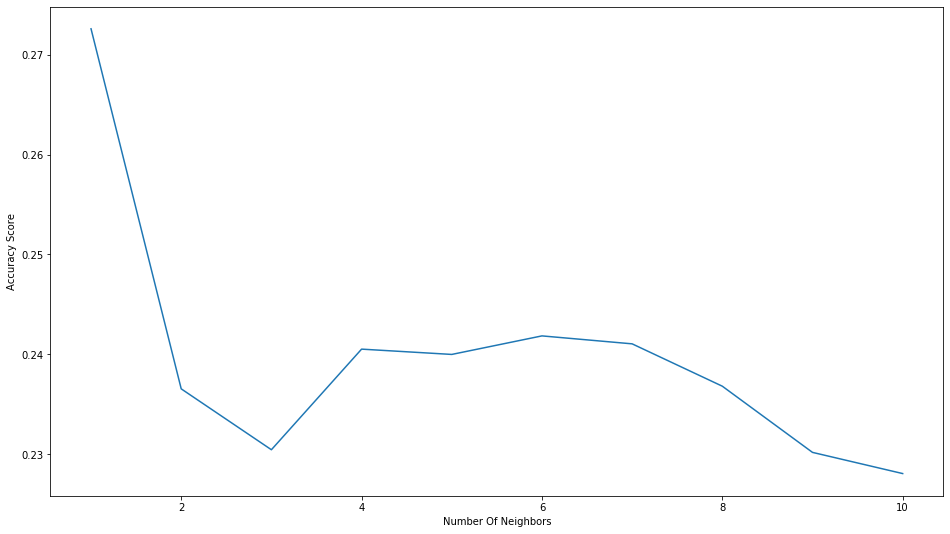

In [31]:
print("Num of neighbours with best accuracy = ", max_neighbour+1)
print("Accuracy with euclidean metric = ", accuracy_score(predict(X_train, X_test, y_train, max_neighbour+1), y_test))

x = np.arange(1, 11)
plt.figure(figsize=(16,9))
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy Score")
plt.plot(x, y)
plt.show()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

Best accuracy =  0.5582073720498542
Num of neighbours with best accuracy =  9


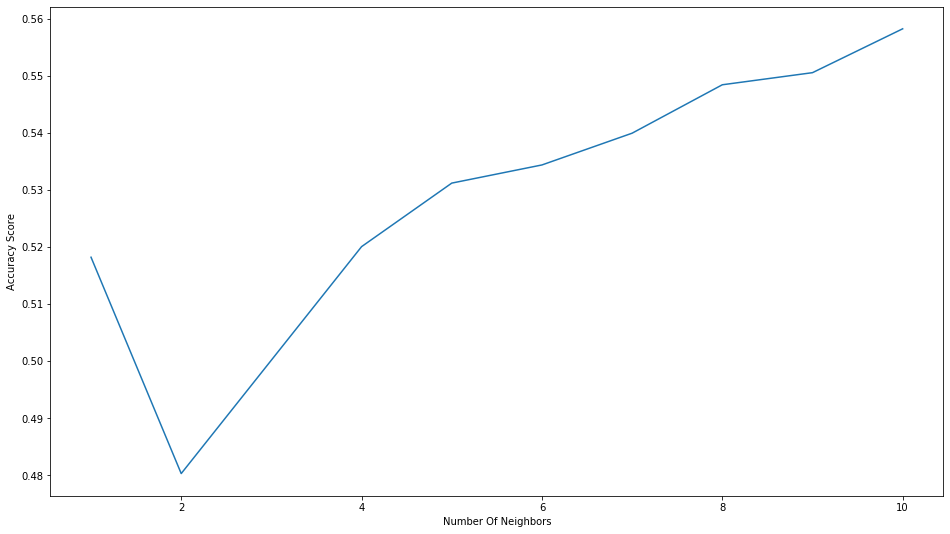

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

def predict(X_train, X_test, y_train, n_neighbors):
    clf = KNeighborsClassifier(n_neighbors, algorithm='brute', metric='cosine')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    return y_pred

x = np.arange(1, 11)
y = np.array([accuracy_score(predict(X_train, X_test, y_train, i), y_test) for i in x])
print("Best accuracy = ", np.max(y))
print("Num of neighbours with best accuracy = ", np.argmax(y))

plt.figure(figsize=(16,9))
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy Score")
plt.plot(x, y)
plt.show()

Как видим, с использованием косинусной метрики качество на валидации существенно улучшилось

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', min_df=10)
X = tfidf.fit_transform(data).toarray()
X.shape

(11314, 10441)

In [34]:
k_fold = KFold(n_splits=3)
for (train, test) in k_fold.split(X, target):
    X_train = X[train]
    y_train = target[train]
    X_test = X[test]
    y_test = target[test]

Основываясь на предыдущих результатах, я обучаю KNeighborsClassifier с использованием косинусной метрики на 9 соседях

In [35]:
def predict_tfidf(X_train, X_test, y_train, n_neighbors):
    clf = KNeighborsClassifier(n_neighbors, algorithm='brute', metric='cosine')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    return y_pred

x = np.arange(1, 11)

print("Best accuracy = ", accuracy_score(predict_tfidf(X_train, X_test, y_train, 9), y_test))

Best accuracy =  0.64147440997083


С использованием TfIdf получаем улучшение качества на валидационной выборки

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [36]:
import pandas as pd

newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])
df_train = pd.DataFrame({"Data":np.array(newsgroups['data']), "Targets": newsgroups['target']})
df_train

,Data,Targets
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,\nDo you have Weitek's address/phone number? ...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14
...,...,...
11309,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13
11310,"I have a (very old) Mac 512k and a Mac Plus, b...",4
11311,I just installed a DX2-66 CPU in a clone mothe...,3
11312,\nWouldn't this require a hyper-sphere. In 3-...,1


In [37]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])
df_test = pd.DataFrame({"Data":np.array(newsgroups['data']), "Targets": newsgroups['target']})
df_test

,Data,Targets
0,I am a little confused on all of the models of...,7
1,I'm not familiar at all with the format of the...,5
2,"\nIn a word, yes.\n",0
3,\nThey were attacking the Iraqis to drive them...,17
4,\nI've just spent two solid months arguing tha...,19
...,...,...
7527,"\n Henry, if I read you correctly, you may b...",14
7528,"about\nthem on\n\nActually, I thought Macs wer...",4
7529,"I sent a version of this post out a while ago,...",9
7530,I have this kit which includes the following :...,6


In [38]:
df = pd.concat([df_train, df_test], axis=0, ignore_index=True)
df

,Data,Targets
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,\nDo you have Weitek's address/phone number? ...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14
...,...,...
18841,"\n Henry, if I read you correctly, you may b...",14
18842,"about\nthem on\n\nActually, I thought Macs wer...",4
18843,"I sent a version of this post out a while ago,...",9
18844,I have this kit which includes the following :...,6


In [39]:
vec = tfidf.fit_transform(df['Data']).toarray()
vec.shape

(18846, 14594)

In [40]:
Train = vec[:df_train.shape[0]]
clf = KNeighborsClassifier(9, algorithm='brute', metric='cosine')
clf.fit(Train, df_train['Targets'])

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='cosine',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [43]:
Test = vec[df_train.shape[0]:]
pred_targets = clf.predict(Test)

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [44]:
accuracy_score(pred_targets, df_test['Targets'])

0.5889537971322358

Как видим, точность модели на тестовой части хуже, чем на валидационной. Я думаю, что это связано с тем, что данные на тренировочной и на валидационной выборках больше похожи друг на друга, чем данные на тренировочной и на тестовой выборках соответственно